In [3]:
import pickle
window_col_good = pickle.load(open('./data_saved/acceptable_windows.p','rb'))
window_col_bad = pickle.load(open('./data_saved/unacceptable_windows.p','rb'))
window_col_irr = pickle.load(open('./data_saved/irrecoverable_windows.p','rb'))
good,bad = window_col_good , window_col_irr+window_col_bad
print(len(good),len(window_col_bad),len(window_col_irr))

4085 1730 2622


In [ ]:
from scipy.stats import skew,kurtosis
import numpy as np
from scipy import signal
from scipy.stats import iqr
def get_metric(x):
    f,pxx = signal.welch(x,fs=25,nperseg=len(x),nfft=10000)
    pxx = np.abs(pxx)
    pxx = pxx/max(pxx)
    peaks_loc1,_ = signal.find_peaks(pxx[np.where((f>.8)&(f<2.5))[0]],height=.1)
    if len(peaks_loc1)==0:
        return [skew(x),kurtosis(x),np.trapz(pxx[np.where((f>.8)&(f<2.5))[0]])/np.trapz(pxx),-1]
    else:
        return [skew(x),kurtosis(x),np.trapz(pxx[np.where((f>.8)&(f<2.5))[0]])/np.trapz(pxx),10]
feature = np.zeros((0,4))
std_col = []
mean_col = []
for i,a in enumerate(window_col):
    a[:,5:8] = a[:,5:8]*2/16384 
    if label_col[i]==1:
        tmp = get_metric(a[:,4])
        tmp = np.array(tmp[:3]+[1]).reshape(-1,4)
        feature = np.concatenate((feature,tmp))
        std_col.append(np.sqrt(np.sum(np.power(np.std(a[:,5:8],axis=0),2))))
        mean_col.append(np.sqrt(np.sum(np.power(np.mean(a[:,5:8],axis=0),2))))
    elif label_col[i]==-1:
        tmp = get_metric(a[:,4])
        tmp = np.array(tmp[:3]+[-1]).reshape(-1,4)
        feature = np.concatenate((feature,tmp))
        std_col.append(np.sqrt(np.sum(np.power(np.std(a[:,5:8],axis=0),2))))
        mean_col.append(np.sqrt(np.sum(np.power(np.mean(a[:,5:8],axis=0),2))))
for i,a in enumerate(window_col):
    if label_col[i]==0:
        tmp = get_metric(a[:,4])
        if tmp[-1]==-1:
            tmp = np.array(tmp[:3]+[0]).reshape(-1,4)
            feature = np.concatenate((feature,tmp))
            std_col.append(np.sqrt(np.sum(np.power(np.std(a[:,5:8],axis=0),2))))
            mean_col.append(np.sqrt(np.sum(np.power(np.mean(a[:,5:8],axis=0),2))))
    
    
print(len(feature[feature[:,-1]==1]),len(feature[feature[:,-1]==-1]),len(feature[feature[:,-1]==0]))

In [2]:
from scipy.stats import skew,kurtosis
import numpy as np
from scipy import signal
from scipy.stats import iqr
def get_metric(x):
    f,pxx = signal.welch(x,fs=25,nperseg=len(x),nfft=10000)
    pxx = np.abs(pxx)
    pxx = pxx/max(pxx)
    peaks_loc1,_ = signal.find_peaks(pxx[np.where((f>.8)&(f<2.5))[0]],height=.1)
    return [skew(x),kurtosis(x),np.trapz(pxx[np.where((f>.8)&(f<2.5))[0]])/np.trapz(pxx),10]
feature = np.zeros((0,4))
for i,a in enumerate(good):
    tmp = get_metric(a[:,1])
    tmp = np.array(tmp[:3]+[1]).reshape(-1,4)
    feature = np.concatenate((feature,tmp))
for i,a in enumerate(bad):
    tmp = get_metric(a[:,1])
    tmp = np.array(tmp[:3]+[-1]).reshape(-1,4)
    feature = np.concatenate((feature,tmp))
print(feature.shape)

(8437, 4)


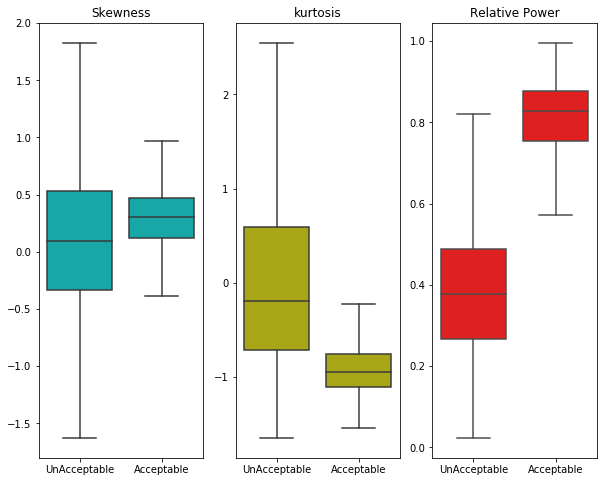

In [42]:
titles = ['Skewness','kurtosis','Relative Power']
cl = ['c','y','r']
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,8),nrows=1, ncols=3,sharex=False)
# ff= [mean_col,std_col]
for i in range(0,3,1):
    sns.boxplot(y=feature[:,i],
                x=feature[:,-1], ax=ax[i],color=cl[i],showfliers=False)
#     plt.xticks(rotation='vertical')

    plt.setp(ax[i],xticks=[0,1],
         xticklabels=['UnAcceptable','Acceptable'],title=titles[i])
    ax[i].tick_params(axis='x', which='minor', labelsize='small', labelcolor='m', rotation=90)
# plt.xticks(rotation='vertical')
plt.savefig('./data_saved/inertial_distribution_only_unacceptable_acceptable.pdf',dps=1000)
plt.show()

In [ ]:
titles = ['Skewness','kurtosis','Relative Power']
cl = ['c','y','b']
import seaborn as sns
fig,ax = plt.subplots(figsize=(7,4),nrows=1, ncols=3,sharex=False)
ff= [mean_col,std_col]
for i in range(0,3,1):
    sns.boxplot(y=feature[:,i],
                x=feature[:,-1], ax=ax[i],color=cl[i],showfliers=False)
#     plt.xticks(rotation='vertical')

    plt.setp(ax[i],xticks=[0,1,2],
         xticklabels=['UnAccep','Irrecover.','Acceptable'],title=titles[i])
#     ax[i].tick_params(axis='x', which='minor', labelsize='small', labelcolor='m', rotation=180)
# plt.xticks(rotation='vertical')
plt.savefig('./data_saved/inertial_distribution.pdf',dps=1000)
plt.show()

In [ ]:
import pandas as pd
df = pd.DataFrame(data=feature,    # values
              index=range(feature.shape[0]),    # 1st column as index
              columns=['Skewness','Kurtosis','Relative Power','Label'])
df['Label'][df['Label']==1] = 'Acceptable'
df['Label'][df['Label']==0] = 'Irrecoverable'
df['Label'][df['Label']==-1] = 'Unacceptable'


In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
# fig,ax = plt.subplots()
sns.pairplot(df, hue="Label")
# plt.savefig('./data_saved/pairplot_good_unacceptable_irrecoverable_data.png',dps=1000)
plt.show()

In [ ]:
np.unique(feature[:,-1])

In [6]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
index_good = np.where(feature[:,-1]==1)[0]
# index_bad = np.where(feature[:,-1]==0)[0]
index_irr = np.where(feature[:,-1]==-1)[0]
index_bad = []
X_train ,y_train = np.concatenate([feature[index_irr[:int(.66*len(index_irr))],:3],
                                   feature[index_good[:int(.66*len(index_good))],:3]]),\
                   np.concatenate([feature[index_irr[:int(.66*len(index_irr))],-1],
                                   feature[index_good[:int(.66*len(index_good))],-1]])
X_test ,y_test = np.concatenate([feature[index_irr[int(.66*len(index_irr)):],:3],
                                 feature[index_bad,:3],
                                   feature[index_good[int(.66*len(index_good)):],:3]]),\
                   np.concatenate([feature[index_irr[int(.66*len(index_irr)):],-1],
                                   feature[index_bad,-1],
                                   feature[index_good[int(.66*len(index_good)):],-1]])
print(np.unique(y_test))
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
clf = LogisticRegressionCV(penalty='l2',solver='lbfgs',Cs=np.logspace(-3,30,100),scoring='recall',cv=skf.get_n_splits(X_train, y_train))
# # # # clf = SVC()
# predict = cross_val_predict(clf,X_train,y_train,cv=10)
clf.fit(X_train,y_train)
predict = clf.predict(X_train)
y_pred = clf.predict(X_test)
# print(np.unique(y_pred))
# # # print(np.mean(score)*100)
# # # print(np.std(score)*100)
print(confusion_matrix(y_train,predict),
      f1_score(y_train,predict),
      precision_score(y_train,predict),
      recall_score(y_train,predict))
print(confusion_matrix(y_test,y_pred),
      f1_score(y_test,y_pred),
      precision_score(y_test,y_pred),
      recall_score(y_test,y_pred))
# # print(np.unique(y_pred),np.unique(y_test))
# print(confusion_matrix(y_test,y_pred))
# y_test1 = y_test
# y_test1[y_test1==0] = y_test1[y_test1==0]-1
# print(confusion_matrix(y_test1,y_pred))
# print(f1_score(y_test1,y_pred),
#       precision_score(y_test1,y_pred),
#       recall_score(y_test1,y_pred))

pickle.dump(clf,open('./data_saved/quality_classifier.p','wb'))

[-1.  1.]
(5568, 3) (5568,) (2869, 3) (2869,)
[[2800   72]
 [ 165 2531]] 0.9552745801094547 0.9723396081444488 0.9387982195845698
[[1145  335]
 [  76 1313]] 0.86466908133026 0.7967233009708737 0.9452843772498201


In [ ]:
import pandas as pd
df = pd.DataFrame(data=np.concatenate([np.array(mean_col).reshape(-1,1),np.array(std_col).reshape(-1,1),
                                       feature[:,-1].reshape(-1,1)],axis=1),    # values
              index=range(feature.shape[0]),    # 1st column as index
              columns=['Magnitude Mean','Magnitude Standard Deviation','Label'])
df['Label'][df['Label']==1] = 'Acceptable'
df['Label'][df['Label']==-1] = 'Irrecoverable'


In [ ]:
df

In [ ]:
%matplotlib inline
sns.boxplot(x='Label',y=['Magnitude Mean','Magnitude Mean'],data=df)
plt.show()

In [ ]:
from scipy.stats import kstest
kstest(mean_col,std_col)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
for i,a in enumerate(window_col_good):
    if not os.path.isdir('./images_saved/acceptable'):
        os.makedirs('./images_saved/acceptable')
    plt.figure()
    plt.plot((a[:,0]-a[0,0])/1000,a[:,1])
    plt.savefig('./images_saved/acceptable'+'/'+str(i)+'.pdf',dps=1000)
    plt.close('all')
for i,a in enumerate(window_col_bad):
    if not os.path.isdir('./images_saved/unacceptable'):
        os.makedirs('./images_saved/unacceptable')
    plt.figure()
    plt.plot((a[:,0]-a[0,0])/1000,a[:,1])
    plt.savefig('./images_saved/unacceptable'+'/'+str(i)+'.pdf',dps=1000)
    plt.close('all')
#     plt.show()